<AxesSubplot:xlabel='Defaulter', ylabel='JobsSupported'>

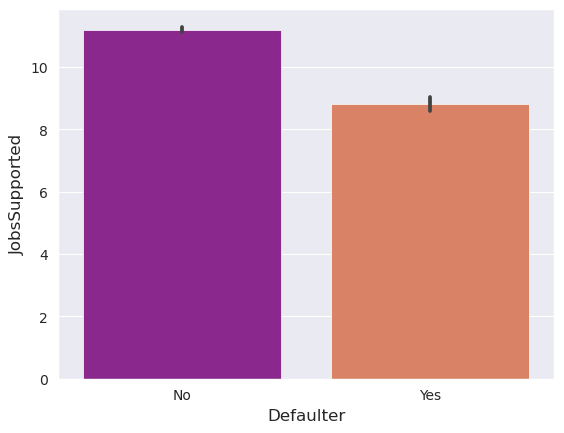

In [12]:
# set the background style of the plot
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
sns.barplot(x ='Defaulter', y ='JobsSupported', data = Full_Data, palette ='plasma')
 


<AxesSubplot:xlabel='Defaulter', ylabel='TermInMonths'>

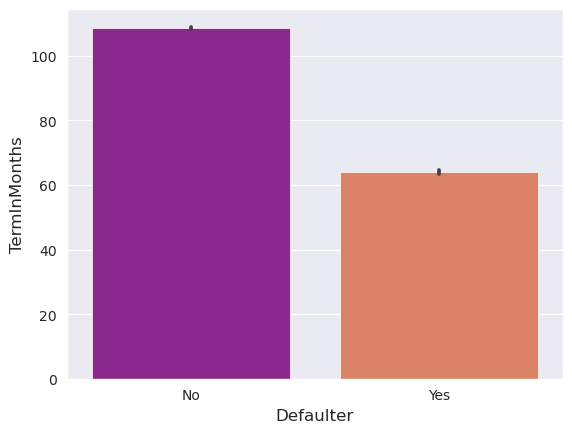

In [13]:
# plot the graph using the default estimator mean
sns.barplot(x ='Defaulter', y ='TermInMonths', data = Full_Data, palette ='plasma')

In [14]:
#Convert Date fields to datetime format
Full_Data['ApprovalDate'] = pd.to_datetime(Full_Data['ApprovalDate'], format='%d-%m-%Y')

In [15]:
#Lets check how many transactions or records are present for each Approval Date
Full_Data.groupby('ApprovalDate').size()

ApprovalDate
2009-10-01    114
2009-10-02    142
2009-10-05    138
2009-10-06    160
2009-10-07    134
             ... 
2020-05-06      1
2020-05-08      1
2020-05-29      1
2020-06-01      1
2020-06-08      1
Length: 3261, dtype: int64

From the grouping, we can see that there is an almost uniform distribution of data on the different approval dates. 

In [16]:
#Lets check how many transactions or records are present for each Approval Fiscal Year
Full_Data.groupby('ApprovalFiscalYear').size()

ApprovalFiscalYear
2010    37037
2011    39818
2012    32525
2013    30465
2014    29620
2015    29435
2016    21347
2017    13799
2018     7047
2019     2030
2020      192
dtype: int64

<AxesSubplot:xlabel='Defaulter', ylabel='ApprovalFiscalYear'>

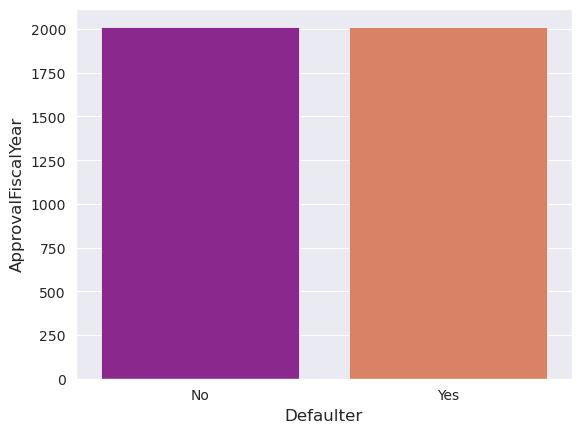

In [17]:
# plot the graph using the default estimator mean
sns.barplot(x ='Defaulter', y ='ApprovalFiscalYear', data = Full_Data, palette ='plasma')

<a id="subsection3.5"></a>
### Visualize Relationships between categorical data

Defaulter         No    Yes
BusinessType               
CORPORATION   192673  17470
INDIVIDUAL     25992   2966
PARTNERSHIP     3977    234


<AxesSubplot:xlabel='BusinessType'>

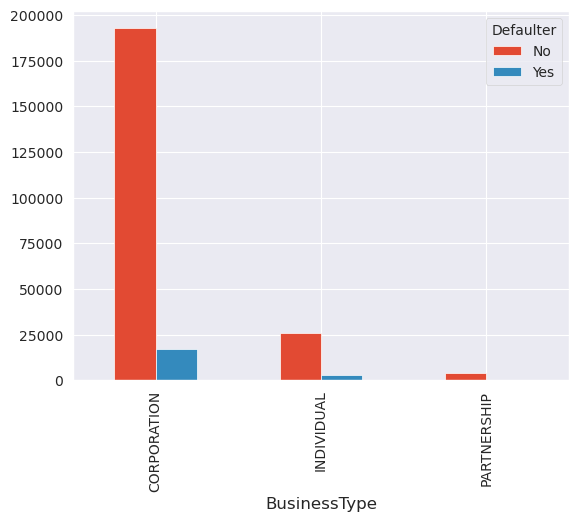

In [18]:
# Cross tabulation between BusinessType and LOANSTATUS/Defaulter variables
CrosstabResult=pd.crosstab(index=Full_Data['BusinessType'],columns=Full_Data['Defaulter'])
print(CrosstabResult)
CrosstabResult.plot.bar()

<a id="section4"></a>
## Encoding the Categorical Variables

Our dataset consists of several categorical variables. Due to High cardinality of some attributes, we discarded some of them, since variables with cardinality more than even 50 % in a large dataset makes training our model less efficient. The next thing is the requirement of numeric input/output variables by many Machine Learning Models. Since we have several attributes that are categorical, it is best to encode them using one of the Encoding methods that are available. Then we can apply algorithms from the for modeling. Let's use encoding for our categorical variables.

In [19]:
#We have a very large dataset with categorical data. So lets take a smaller dataset, pertaining to a certain 'Project State', in order to quickly process our algorithm.
Data_filtered = Full_Data[Full_Data['ProjectState']=="NY"]

Project_State="NY"
 
# Print the new dataframe
Data_filtered.head()



,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,...,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Defaulter
22,20200930,7A,545 Johanny Barber Shop Inc/Jo,545 West 125th Street.,Manhattan,NY,10027,Lower East Side People's FCU,37 Ave B,NEW YORK CITY,...,NEW YORK DISTRICT OFFICE,13.0,CORPORATION,PIF,31-10-2014,NaN,0,0,4,No
32,20200930,7A,Dr Nick Gabriel,48 Route 25A Ste 104,SMITHTOWN,NY,11787,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,...,MELVILLE BRANCH OFFICE,1.0,INDIVIDUAL,PIF,31-07-2014,NaN,0,0,2,No
33,20200930,7A,COMPUTER CONFIDENCE INC.,80 OFFICE PARKWAY STE 3,PITTSFORD,NY,14534,"Citizens Bank, National Association",1 Citizens Plaza,PROVIDENCE,...,ROCHESTER BRANCH OFFICE,25.0,CORPORATION,PIF,31-08-2012,NaN,0,1,9,No
89,20200930,7A,New York KomTang House Corp.,32 West 32nd Street,New York,NY,10001,Shinhan Bank America,475 Park Ave S 4th Flr,NEW YORK CITY,...,NEW YORK DISTRICT OFFICE,10.0,CORPORATION,PIF,30-11-2013,NaN,0,0,13,No
91,20200930,7A,F Monti Enterprises Ltd,444 Latta Rd,ROCHESTER,NY,14612,KeyBank National Association,127 Public Sq,CLEVELAND,...,ROCHESTER BRANCH OFFICE,25.0,CORPORATION,PIF,30-11-2016,NaN,0,0,3,No


In [20]:
Dataset_Size=len(Data_filtered)

# Print the shape of the dataframe
Data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15131 entries, 22 to 560477
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AsOfDate               15131 non-null  int64         
 1   Program                15131 non-null  object        
 2   BorrName               15130 non-null  object        
 3   BorrStreet             15131 non-null  object        
 4   BorrCity               15131 non-null  object        
 5   BorrState              15131 non-null  object        
 6   BorrZip                15131 non-null  int64         
 7   BankName               15131 non-null  object        
 8   BankStreet             15131 non-null  object        
 9   BankCity               15131 non-null  object        
 10  BankState              15131 non-null  object        
 11  BankZip                15131 non-null  object        
 12  GrossApproval          15131 non-null  int64         
 13 

<a id="subsection4.1"></a>
### OneHotEncoder()

In [21]:
#import Encoder library files from sklearn
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#fill in missing values 
#We might encounter missing values when we take different samplings of the dataset.
#Based on our discover during exploratory analysis, we need to deal with such variables
#Data_filtered=Data_filtered['BusinessType'].fillna("Not Mentioned", inplace = True)
#Data_filtered=Data_filtered['CongressionalDistrict'].fillna(method='pad')

#Removing Columns since they both are highly correlated, and it has the same value in this subset of our data, i.e., name of the state
Data_filtered.drop(['ProjectState','SBADistrictOffice','BusinessType'],axis=1)

#create an instance
#drop='first' is called a dummy variable trap, and drops the dummy column

#OHE = OneHotEncoder(drop='first')

#OHE_df = pd.DataFrame(OHE.fit_transform(Data_filtered[['BusinessType']]).toarray())
#OHE_df.info()

#Data_New =Data_filtered.join(OHE_df)
#Data_New.head()


,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,...,FranchiseName,ProjectCounty,CongressionalDistrict,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,Defaulter
22,20200930,7A,545 Johanny Barber Shop Inc/Jo,545 West 125th Street.,Manhattan,NY,10027,Lower East Side People's FCU,37 Ave B,NEW YORK CITY,...,NaN,NEW YORK,13.0,PIF,31-10-2014,NaN,0,0,4,No
32,20200930,7A,Dr Nick Gabriel,48 Route 25A Ste 104,SMITHTOWN,NY,11787,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,...,NaN,SUFFOLK,1.0,PIF,31-07-2014,NaN,0,0,2,No
33,20200930,7A,COMPUTER CONFIDENCE INC.,80 OFFICE PARKWAY STE 3,PITTSFORD,NY,14534,"Citizens Bank, National Association",1 Citizens Plaza,PROVIDENCE,...,NaN,MONROE,25.0,PIF,31-08-2012,NaN,0,1,9,No
89,20200930,7A,New York KomTang House Corp.,32 West 32nd Street,New York,NY,10001,Shinhan Bank America,475 Park Ave S 4th Flr,NEW YORK CITY,...,NaN,NEW YORK,10.0,PIF,30-11-2013,NaN,0,0,13,No
91,20200930,7A,F Monti Enterprises Ltd,444 Latta Rd,ROCHESTER,NY,14612,KeyBank National Association,127 Public Sq,CLEVELAND,...,NaN,MONROE,25.0,PIF,30-11-2016,NaN,0,0,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552457,20200930,7A,Eberly Excavating,5606 STATE ROUTE 14A,DUNDEE,NY,14837,Five Star Bank,55 N Main St,WARSAW,...,NaN,YATES,23.0,PIF,31-05-2020,NaN,0,0,1,No
555486,20200930,7A,KORUCE LLC,1151 State Route 55 suite 201,Lagrangeville,NY,12540,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,...,NaN,DUTCHESS,19.0,PIF,31-05-2020,NaN,0,0,1,No
556948,20200930,7A,"ANTHONY CICCONE AGENCY, INC.",684 5TH AVE C/O ALLSTATE CO,BROOKLYN,NY,11215,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,...,NaN,KINGS,7.0,PIF,31-08-2020,NaN,0,1,0,No
558323,20200930,7A,RIKKEL CORP,544 Park Ave Ste 107,Brooklyn,NY,11205,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,...,NaN,KINGS,8.0,PIF,31-08-2020,NaN,0,1,0,No


In [22]:
#drop 'BusinessType' column
#Data_New.drop('BusinessType', axis=1, inplace=True)

Data_filtered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 15131 entries, 22 to 560477
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AsOfDate               15131 non-null  int64         
 1   Program                15131 non-null  object        
 2   BorrName               15130 non-null  object        
 3   BorrStreet             15131 non-null  object        
 4   BorrCity               15131 non-null  object        
 5   BorrState              15131 non-null  object        
 6   BorrZip                15131 non-null  int64         
 7   BankName               15131 non-null  object        
 8   BankStreet             15131 non-null  object        
 9   BankCity               15131 non-null  object        
 10  BankState              15131 non-null  object        
 11  BankZip                15131 non-null  object        
 12  GrossApproval          15131 non-null  int64         
 13 

<a id="subsection4.2"></a>
### LabelEncoder()

In [23]:
#Many algorithms we intend to run do not support categorical variables
#Wecan encode the target variable usng LabelEncoder()
LE=LabelEncoder()

Data_filtered['LoanStatus']=LE.fit_transform(Data_filtered['LoanStatus'])
Data_filtered['LoanStatus'].describe()

count    15131.000000
mean         0.913621
std          0.280932
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: LoanStatus, dtype: float64

In [24]:
Data_filtered['Defaulter']=LE.fit_transform(Data_filtered['Defaulter'])

Data_filtered['Defaulter'].describe()

count    15131.000000
mean         0.086379
std          0.280932
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Defaulter, dtype: float64

In [25]:
x_data=Data_filtered[['ApprovalFiscalYear','InitialInterestRate','TermInMonths','NaicsCode','CongressionalDistrict','JobsSupported']]
y_data=Data_filtered['Defaulter']

In [26]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15131 entries, 22 to 560477
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ApprovalFiscalYear     15131 non-null  int64  
 1   InitialInterestRate    15131 non-null  float64
 2   TermInMonths           15131 non-null  int64  
 3   NaicsCode              15130 non-null  float64
 4   CongressionalDistrict  15131 non-null  float64
 5   JobsSupported          15131 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 827.5 KB


In [27]:
#NaicsCode has a missing value. 
#Here I filled it with the most frequently occurring value, identified from Pandas_Profile report.
#When the Columns have null values, it gives an error in further processes

x_data['NaicsCode'].fillna(722511, inplace = True)


In [28]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15131 entries, 22 to 560477
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ApprovalFiscalYear     15131 non-null  int64  
 1   InitialInterestRate    15131 non-null  float64
 2   TermInMonths           15131 non-null  int64  
 3   NaicsCode              15131 non-null  float64
 4   CongressionalDistrict  15131 non-null  float64
 5   JobsSupported          15131 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 827.5 KB


In [29]:
y_data.describe()

count    15131.000000
mean         0.086379
std          0.280932
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Defaulter, dtype: float64

In [30]:
#x_data=x_data.dropna()
#x_newdata = x_data[np.isfinite(x_data).all(1)]
#x_newdata =x_newdata.reset_index()

<a id="section5"></a>
## Splitting the Dataset into Training and Testing Sets

We need to split the data into Training set and Test Set in order to perform Training and Modeling of the Machine Learning algorithm. Let's use the sklearn library to do this. We must arrange the dataset as features and target attributes, before we can proceed, since we have raw data with us. Here, the outcome or target labels are in the "LoanStatus" Column. So we can set that as the target variable. 

In [31]:
#Split the Dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle=False)

#Check the shape of the training and testing sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape



((12104, 6), (3027, 6), (12104,), (3027,))

<a id="section6"></a>
## Train a Model using the training set and make predictions using Test set

The next steps are iterative, until we find the best model that gives accurate results. With this loan dataset, we can try out the modeling with data from different project States of USA. Set the Project state value to the different values in that column. This helps you to get different datasets to try out.

The next thing is to change the size of the Training set and Testing set and to run the models again, until we find the best model. These and other parameters related to different Machine Learning Algorithms are hyper parameters, that can be tuned until we get the best model. 

In [32]:
# Normalizing the features for stable and fast training.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [33]:
#Import necessary libraries from sklearn
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

<a id="subsection6.1"></a>
### Decision Tree

In [34]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [35]:
print('Training Accuracy : ', roc_auc_score(y_train, regressor.predict(x_train)))
print('Validation Accuracy : ', roc_auc_score(y_test, regressor.predict(x_test)))
print()

Training Accuracy :  1.0
Validation Accuracy :  0.6952576623558033



In [36]:
#Recollecting the US state name used and Dataset Size
print("Project State:",Project_State)
print("Size of Dataset:",Dataset_Size)

Project State: NY
Size of Dataset: 15131


<a id="subsection6.2"></a>
### Support Vector Machine

In [37]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
  


SVC()

In [38]:
print('Training Accuracy : ', roc_auc_score(y_train, model.predict(x_train)))
print('Validation Accuracy : ', roc_auc_score(y_test, model.predict(x_test)))
print()

Training Accuracy :  0.6046065295750378
Validation Accuracy :  0.5031545741324921



In [39]:
LE_result_decode = dict(zip(LE.classes_, LE.transform(LE.classes_)))
print(LE_result_decode)

{'No': 0, 'Yes': 1}


In [40]:
confusion_matrix(y_train, model.predict(x_train))

array([[11048,    66],
       [  777,   213]])

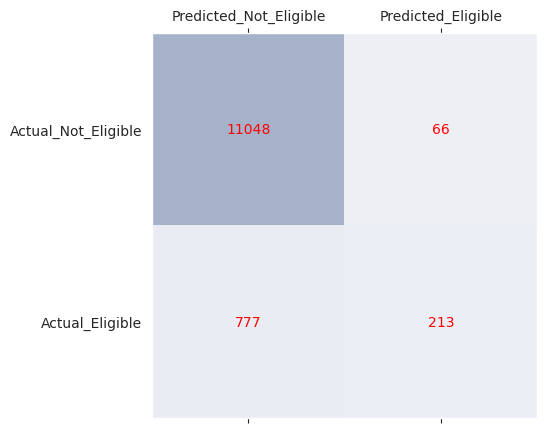

In [41]:
cm = confusion_matrix(y_train, model.predict(x_train))
fig, ax = plt.subplots(figsize=(5, 5))
#ax.imshow(cm)
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted_Not_Eligible', 'Predicted_Eligible'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual_Not_Eligible', 'Actual_Eligible'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [42]:
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11114
           1       0.76      0.22      0.34       990

    accuracy                           0.93     12104
   macro avg       0.85      0.60      0.65     12104
weighted avg       0.92      0.93      0.91     12104



<a id="subsection6.3"></a>
### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [44]:
model.predict_proba(x_train)

array([[0.84397341, 0.15602659],
       [0.94387349, 0.05612651],
       [0.97882572, 0.02117428],
       ...,
       [0.96260224, 0.03739776],
       [0.972112  , 0.027888  ],
       [0.99380936, 0.00619064]])

In [45]:
model.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
model.score(x_train, y_train)

0.9279576999339062

In [47]:
confusion_matrix(y_train, model.predict(x_train))

array([[10979,   135],
       [  737,   253]])

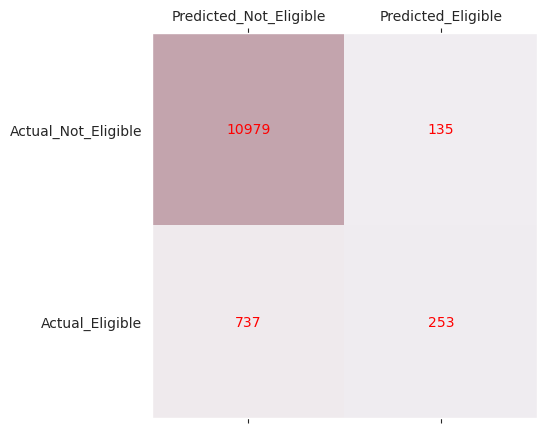

In [48]:
cm = confusion_matrix(y_train, model.predict(x_train))
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted_Not_Eligible', 'Predicted_Eligible'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual_Not_Eligible', 'Actual_Eligible'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [49]:
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     11114
           1       0.65      0.26      0.37       990

    accuracy                           0.93     12104
   macro avg       0.79      0.62      0.66     12104
weighted avg       0.91      0.93      0.91     12104



<a id="subsection6.4"></a>
### Naive Bayes Classifier

In [50]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train)


GaussianNB()

In [51]:
# Predict Output
#The index value in x_test is the i-th record in the test dataset. This can be changed as per record size.
predicted = model.predict([x_test[999]])


In [52]:
print("Actual Value:", y_test)


Actual Value: 293192    0
293199    0
293231    1
293324    1
293556    0
         ..
552457    0
555486    0
556948    0
558323    0
560477    0
Name: Defaulter, Length: 3027, dtype: int64


In [53]:
print("Predicted Value:", predicted)
print(LE_result_decode)
if predicted==0:
    print("Applicant is Eligible for Loan Approval.")
elif predicted==1:
    print("Applicant is Not Eligible for Loan Approval.")

Predicted Value: [0]
{'No': 0, 'Yes': 1}
Applicant is Eligible for Loan Approval.


<a id="section7"></a>
## Comparison of Algorithms

In [54]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [55]:
# prepare configuration for cross validation test harness
seed = 3
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [56]:
# evaluate each model in turn
results = []
names=[]
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)


LR: 0.927378 (0.006535)
LDA: 0.918210 (0.006669)
KNN: 0.921595 (0.007862)
CART: 0.932336 (0.009264)
NB: 0.918375 (0.006626)
SVM: 0.928288 (0.007383)


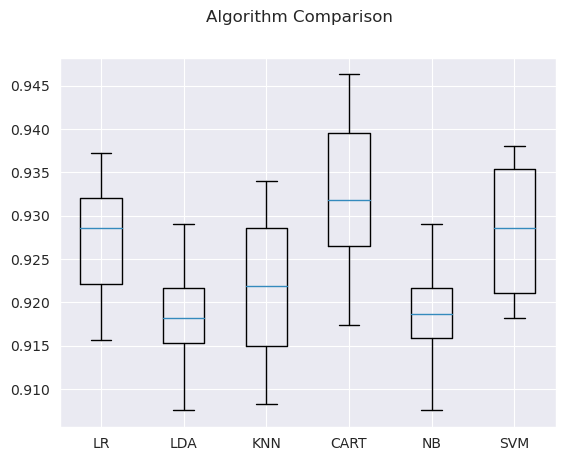

In [57]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<a id="section8"></a>
## References:

##### https://www.tandfonline.com/doi/epdf/10.1080/10691898.2018.1434342?needAccess=true&role=button
##### https://towardsdatascience.com/predict-loan-eligibility-using-machine-learning-models-7a14ef904057
##### https://github.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio
##### https://www.analyticsvidhya.com/blog/2022/05/loan-prediction-problem-from-scratch-to-end/
##### https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html

#### Data Profiling: 
##### https://towardsdatascience.com/automated-data-profiling-99523e51048e
##### https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee
##### https://realpython.com/logistic-regression-python/

#### Visualize relationship between categorical data:
How to visualize the relationship between two categorical variables in Python - Thinking Neuron

#### Training and Splitting
##### https://www.aboutdatablog.com/post/splitting-your-data-to-fit-any-machine-learning-model

#### Dataset:
##### https://data.world/nerb/sba-loan-guarantee-data/workspace/file?filename=7a_504_FOIA%2520Data%2520Dictionary.xlsx

#### Categorical encoding cheat sheet
##### https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html
